In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_recall_curve,auc,average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import multilabel_confusion_matrix
%matplotlib inline


## Schools eqao scores exploratory analysis & cleanup
* Data Source : https://www.ontario.ca/data/school-information-and-student-demographics
* File type: xlsx

In [7]:
# Read excel file

path="../Data/Schools_EQAO/School_data_2017_2018.xlsx"
schools_eqao=pd.read_excel(path)
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,N/D,NaN,N/R,NaN,N/R,NaN,22.7,20.5,2019-05-10
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11,56.3,2019-05-10
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-05-10
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32,31.4,2019-05-10
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-05-10


In [8]:
#Describe data
schools_eqao.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrolment,4819.0,418.172235,304.687226,10.00000,216.000000,346.00000,534.00000,2080.00000
Latitude,4887.0,44.232776,1.436708,41.80695,43.481690,43.77387,44.50844,51.46627
Longitude,4887.0,-79.711157,2.593027,-94.56370,-80.308555,-79.56298,-79.21214,-74.47102
Change in Grade 3 Reading Achievement Over Three Years,3084.0,2.948119,13.878343,-56.00000,-5.000000,3.00000,11.00000,65.00000
Change in Grade 3 Writing Achievement Over Three Years,3086.0,-2.086520,16.039496,-74.00000,-11.000000,-3.00000,7.00000,92.00000
Change in Grade 3 Mathematics Achievement Over Three Years,3134.0,-1.945437,16.200346,-77.00000,-12.000000,-2.00000,7.75000,85.00000
Change in Grade 6 Reading Achievement Over Three Years,2917.0,1.146726,11.355510,-42.00000,-5.000000,1.00000,7.00000,57.00000
Change in Grade 6 Writing Achievement Over Three Years,2917.0,-0.562564,13.019662,-68.00000,-8.000000,0.00000,7.00000,64.00000
Change in Grade 6 Mathematics Achievement Over Three Years,2915.0,-1.553002,16.380268,-69.00000,-11.000000,-1.00000,8.00000,65.00000
Change in Grade 9 Academic Mathematics Achievement Over Three Years,699.0,0.964235,10.739298,-50.00000,-4.000000,1.00000,6.00000,64.00000


In [9]:
schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [10]:
# Looking at what a 'percentage' column looks like to understand what sort of cleanup is required
schools_eqao['Percentage of Students Whose First Language Is Not English'].unique()

array([nan, 'SP', '1.7', '6.6', '3', '4.4', '6.4', '5.1', '7.7', '2.6',
       '8.5', '7.9', '3.1', '6.8', '2.9', '2.2', '9.9', '3.3', '4',
       '11.8', '3.6', '4.5', '5.5', '4.1', '3.7', '7.4', '2.4', '13.6',
       '7', '89', '3.2', '6', '6.5', '4.3', '4.8', '7.5', '6.9', '21.8',
       '16.3', '5.6', '1.8', '5.4', '8.1', '8.4', '40.2', '7.2', '9',
       '4.7', '2.8', '4.2', '5.2', '8.7', '2', '10.9', '10.8', '5.9',
       '12.1', '42', '3.4', '61', '51.6', '30.8', '76.8', '75.4', '69.4',
       '53.5', '42.6', '90.6', '63', '78.5', '34.7', '54.7', '59.3', '72',
       '67.9', '86.7', '80.8', '65.5', '58.8', '54.2', '32.1', '41.2',
       '50', '46.2', '64', '38.1', '63.8', '72.4', '68.6', '67.6', '73.1',
       '68.8', '71.2', '43.7', '33.6', '16.8', '47.1', '55.2', '26.4',
       '42.4', '71.5', '60.7', '78.2', '64.6', '63.4', '57.7', '48.9',
       '45.3', '48.4', '38.6', '39.5', '52.3', '12.9', '48.2', '83.3',
       '17', '56.8', '72.9', '75.3', '81.5', '63.6', '37.7', '81.7'

In [11]:
# Change dtype of all columns containing 'percentage' to float, remove % sign and convert to .2f, replace 'nan',''NA',
# 'SP' and 'N/D' by 'NaN'. 

for column in schools_eqao.columns:
    if 'Percentage' in column:
        schools_eqao[column].replace(to_replace=['SP','N/D','N/R','NA',''],value=np.nan,inplace=True)
        schools_eqao[column]= schools_eqao[column].str.replace(r'%',r'').astype('float')

In [12]:
schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [13]:
#Drop columns with blank lat and long

# Get names of indexes for which column Latitude is null
indexNames = schools_eqao[schools_eqao['Latitude'].isnull()].index
 
# Delete these row indexes from dataFrame
schools_eqao.drop(index=indexNames , inplace=True, axis=0)

schools_eqao.reset_index(drop=True)

schools_eqao.count()

Board Number                                                                                4887
Board Name                                                                                  4887
Board Type                                                                                  4887
School Number                                                                               4887
School Name                                                                                 4887
School Type                                                                                 4887
School Special Condition Code                                                               4887
School Level                                                                                4887
School Language                                                                             4887
Grade Range                                                                                 4887
Building Suite                

In [14]:
#Insert new column with avg. EQAO scores 
schools_eqao['Avg_EQAO']=\
schools_eqao[['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
              'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
             ]].mean(axis=1)


In [15]:
#Insert new column with avg. change in EQAO scores 
schools_eqao['Avg_change_EQAO']=\
schools_eqao[['Change in Grade 3 Reading Achievement Over Three Years',\
              'Change in Grade 3 Writing Achievement Over Three Years',\
              'Change in Grade 3 Mathematics Achievement Over Three Years',\
              'Change in Grade 6 Reading Achievement Over Three Years',\
              'Change in Grade 6 Writing Achievement Over Three Years',\
              'Change in Grade 6 Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
              'Change in Grade 10 OSSLT Literacy Achievement Over Three Years'
             ]].mean(axis=1)

In [16]:
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date,Avg_EQAO,Avg_change_EQAO
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-05-10,NaN,NaN
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-05-10,59.666667,-23.166667
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-05-10,68.666667,22.000000
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-05-10,41.333333,-24.333333
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-05-10,45.500000,-14.833333


# Machine Learning

## DATA PREP

In [17]:
#columns to be dropped

col_drop= ['Board Number','School Number','School Name','School Special Condition Code','Building Suite','City',\
           'P.O. Box','Street','Municipality','Province','Postal Code','Phone Number','Fax Number','School Website'\
           ,'Board Website','Latitude','Longitude',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
           'Change in Grade 3 Reading Achievement Over Three Years',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
           'Change in Grade 3 Writing Achievement Over Three Years',\
           'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
           'Change in Grade 3 Mathematics Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
           'Change in Grade 6 Reading Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
           'Change in Grade 6 Writing Achievement Over Three Years',\
           'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
           'Change in Grade 6 Mathematics Achievement Over Three Years',\
           'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
           'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
           'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
           'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
           'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt',\
           'Change in Grade 10 OSSLT Literacy Achievement Over Three Years','Extract Date']
           
           

In [18]:
df_ml=schools_eqao.drop(col_drop, axis=1)

In [19]:
#drop values with NaN Avg EQAO
df_ml.dropna(subset=['Avg_EQAO'])

,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Avg_EQAO,Avg_change_EQAO
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,NaN,100.0,NaN,NaN,14.8,NaN,11.0,56.3,59.666667,-23.166667
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,NaN,100.0,NaN,NaN,NaN,NaN,34.3,37.2,68.666667,22.000000
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,NaN,100.0,NaN,NaN,17.5,NaN,32.0,31.4,41.333333,-24.333333
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,NaN,99.3,NaN,NaN,25.6,NaN,24.8,19.8,45.500000,-14.833333
5,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,313.0,NaN,100.0,NaN,NaN,9.9,NaN,19.0,35.3,77.750000,6.666667
7,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-6,116.0,NaN,100.0,NaN,NaN,17.2,NaN,31.2,31.7,64.000000,-12.000000
8,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,328.0,NaN,99.1,NaN,NaN,29.5,NaN,17.6,21.0,61.666667,5.000000
9,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,274.0,NaN,97.8,NaN,NaN,18.9,NaN,32.5,24.3,21.833333,-25.166667
10,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,68.0,NaN,100.0,NaN,NaN,29.4,NaN,NaN,NaN,46.000000,-27.000000
11,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,91.0,NaN,98.9,NaN,NaN,14.2,NaN,23.7,NaN,38.666667,22.000000


In [20]:
#Delete Columns only when all values are Null
df_ml = df_ml.dropna(axis=1,how='all')

# # Replace NaN with avg value
df_ml.fillna(df_ml.mean(), inplace=True)
# df_ml.fillna(0, inplace=True)

# Delete Constant Columns
df_ml = df_ml.loc[:,df_ml.apply(pd.Series.nunique) != 1]

# Delete columns with 0 EQAO score
df_ml= df_ml[df_ml['Avg_EQAO'] != 0]

# Delete columns with 0 enrolment
df_ml= df_ml[df_ml['Enrolment'] != 0]

# df_ml= df_ml[df_ml['City'] != '']

In [21]:
df_ml=df_ml.rename(index=str,columns={"Percentage of Students Whose First Language Is Not English": "%_First_lang_not_English",\
                      "Percentage of Students Whose First Language Is Not French": "%_First_lang_not_French",\
                     "Percentage of Students Who Are New to Canada from a Non-English Speaking Country": "%_New_from_Non-English_speaking_ctry",\
                     "Percentage of Students Who Are New to Canada from a Non-French Speaking Country": "%_New_from_Non-French_speaking_ctry",\
                     "Percentage of Students Receiving Special Education Services": "%_Special_Edu_Services",\
                     "Percentage of Students Identified as Gifted": "%_Gifted",\
                     "Percentage of Children Who Live in Low-Income Households": "%_Low_Income_Households",\
                     "Percentage of Students Whose Parents Have Some University Education": "%_Parents_have_UniversityEducation",\
                     })

df_ml.columns = df_ml.columns.str.replace(r"Perc", "%")

In [22]:
df_ml.isnull().sum(axis = 0)

Board Name                              0
Board Type                              0
School Type                             0
School Level                            0
School Language                         0
Grade Range                             0
Enrolment                               0
%_First_lang_not_English                0
%_First_lang_not_French                 0
%_New_from_Non-English_speaking_ctry    0
%_New_from_Non-French_speaking_ctry     0
%_Special_Edu_Services                  0
%_Gifted                                0
%_Low_Income_Households                 0
%_Parents_have_UniversityEducation      0
Avg_EQAO                                0
Avg_change_EQAO                         0
dtype: int64

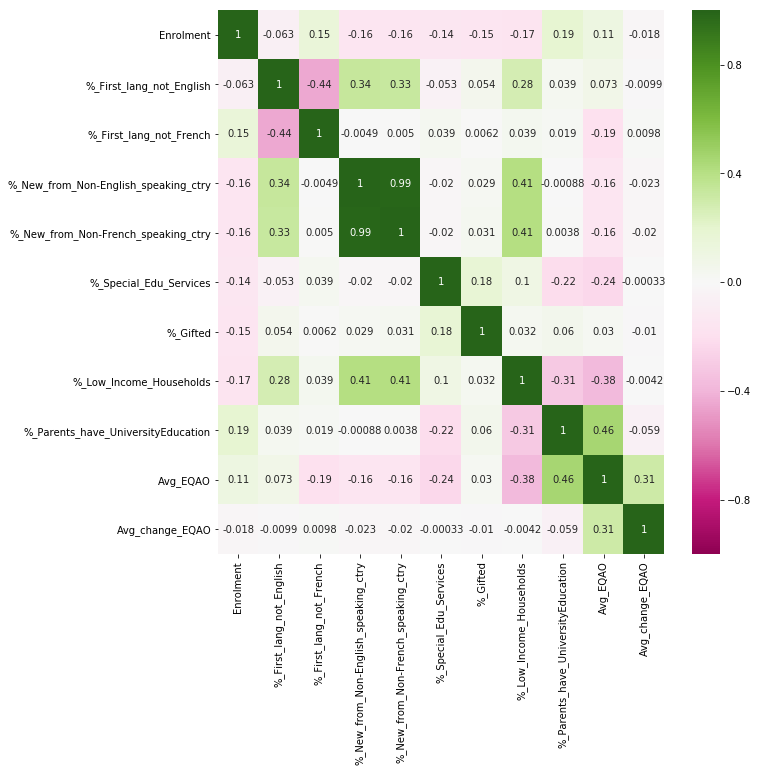

In [23]:
#Plotting a correlation matrix
correl = df_ml.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correl, 
        xticklabels=correl.columns,
        yticklabels=correl.columns, vmin=-1, vmax=1,annot=True,cmap="PiYG")

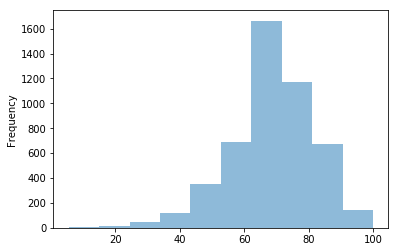

In [24]:
df_ml['Avg_EQAO'].plot.hist(bins=10, alpha=0.5)


In [25]:
# df_ml.boxplot(column=['Avg_EQAO'])

In [197]:
#creating bins
bins = [0,60,80,100]
labels=['Poor','Average','Excellent']
df_ml['EQAO_Class']= pd.cut(df_ml['Avg_EQAO'],bins,labels=labels)
labels_sort=labels.sort()
df_ml.head()


,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,%_First_lang_not_English,%_First_lang_not_French,%_New_from_Non-English_speaking_ctry,%_New_from_Non-French_speaking_ctry,%_Special_Edu_Services,%_Gifted,%_Low_Income_Households,%_Parents_have_UniversityEducation,Avg_EQAO,Avg_change_EQAO,EQAO_Class
0,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,202.0,33.608842,100.0,8.734001,8.702096,19.800000,7.670225,22.7,20.5,68.867572,-0.457434,Average
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,33.608842,100.0,8.734001,8.702096,14.800000,7.670225,11.0,56.3,59.666667,-23.166667,Poor
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,33.608842,100.0,8.734001,8.702096,18.996518,7.670225,34.3,37.2,68.666667,22.000000,Average
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,33.608842,100.0,8.734001,8.702096,17.500000,7.670225,32.0,31.4,41.333333,-24.333333,Poor
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,33.608842,99.3,8.734001,8.702096,25.600000,7.670225,24.8,19.8,45.500000,-14.833333,Poor


In [198]:
#Start Model building
#Create Target and Predictors and split the data in test and training

X = df_ml.drop(['EQAO_Class','Avg_EQAO'],axis=1)
y = df_ml['EQAO_Class']


In [199]:
# Models in scikitlearn can only handle numeric variables so use one-hot-encoding to create dummy variables

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_ohe = enc.transform(X)


In [200]:
# Split the data into test and training with 15% reserved for testing
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y, test_size = 0.30)

In [201]:
y_test.count()

1466

# Logistic Regression

In [202]:
# Compute class weights to use in balancing the data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.55691255 1.73515982 1.59217877]


In [203]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [207]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2','l1']}]

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced',max_iter=200), param_grid, cv= 4,
                      scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train,y_train.tolist())
print ("best parameter: ", grid_search.best_params_)

best_model_log = grid_search.best_estimator_
print ("best_model: ", best_model_log)

/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


best parameter:  {'penalty': 'l1'}
best_model:  LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [208]:
# Predicting the Test set results
y_pred_log = best_model_log.predict(X_test)
y_proba_log = best_model_log.predict_proba(X_test)
# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix

acc_log = accuracy_score(y_test, y_pred_log)
print("The Accuracy score for Logistic Regression is: ", acc_log)

cm_log = confusion_matrix(y_test, y_pred_log)
print("The Confusion matrix for Logistic Regression is: \n" , cm_log)

The Accuracy score for Logistic Regression is:  0.5770804911323328
The Confusion matrix for Logistic Regression is: 
 [[594 147 144]
 [126 116  31]
 [146  26 136]]


[[594 147 144]
 [126 116  31]
 [146  26 136]]


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


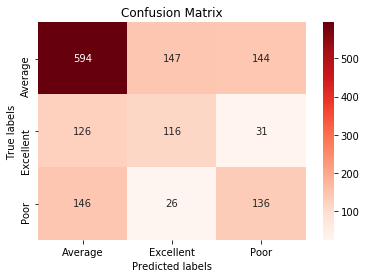

In [209]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_log,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log,
                            target_names=labels_sort))

              precision    recall  f1-score   support

     Average       0.69      0.67      0.68       885
   Excellent       0.40      0.42      0.41       273
        Poor       0.44      0.44      0.44       308

    accuracy                           0.58      1466
   macro avg       0.51      0.51      0.51      1466
weighted avg       0.58      0.58      0.58      1466



## XGBoost

In [314]:
xgb_model = xgb.XGBClassifier()

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5],'learning_rate': [0.1,0.3,0.5],'gamma': [0.1,0.3]}

ind_params = {'n_estimators': 300, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax','num_class':3,'reg_lambda':0.1,'scale_pos_weight':0.15,'class_weight':class_weights}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)


In [315]:
optimized_GBM.fit(X_train, y_train.tolist())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree',
       class_weight=array([1.54472, 1.77847, 0.55855]),
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimat...ha=0, reg_lambda=0.1, scale_pos_weight=0.15,
       seed=0, silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5], 'learning_rate': [0.1, 0.3, 0.5], 'gamma': [0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [316]:
optimized_GBM.best_score_

0.6195906432748538

In [317]:
optimized_GBM.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5}

In [340]:
y_pred_xgb = optimized_GBM.predict(X_test)

In [341]:
optimized_GBM.score(X_test, y_test)

0.6323328785811733

[[ 61 221   4]
 [ 48 794  49]
 [  5 212  72]]


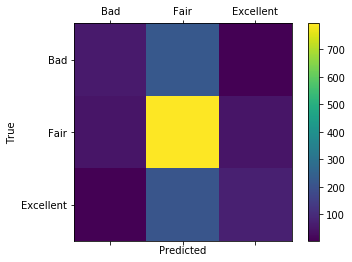

In [342]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_xgb,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [343]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,
                            target_names=labels_sort))

              precision    recall  f1-score   support

         bad       0.54      0.21      0.30       286
   excellent       0.58      0.25      0.35       289
        fair       0.65      0.89      0.75       891

   micro avg       0.63      0.63      0.63      1466
   macro avg       0.59      0.45      0.47      1466
weighted avg       0.61      0.63      0.58      1466



In [197]:
# xgb_model.score(X_test, y_test)

0.6289222373806276

In [198]:
# xgb_model.score(X_train, y_train)

0.6625730994152047

## Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [323]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5,6],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [324]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train.tolist())

/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5964912280701754, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5970149253731343, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, m

[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5970149253731343, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5968448729184925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5964912280701754, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_es

[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5970149253731343, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5968448729184925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5964912280701754, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimator

[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5970149253731343, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5964912280701754, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=3, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_es

[CV]  max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5964912280701754, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5970149253731343, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_es

[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5964912280701754, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5970149253731343, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5968448729184925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimator

[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5968448729184925, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5964912280701754, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18, score=0.5970149253731343, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=22 
[CV]  max_depth=5, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_es

[CV]  max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5964912280701754, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5970149253731343, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=18 
[CV]  max_depth=6, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=15, min_weight_fraction_leaf=0.1, n_es

[CV]  max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5970149253731343, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5964912280701754, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimato

[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.1, n_estimators=22, score=0.5970149253731343, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5968448729184925, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10, score=0.5964912280701754, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=10 
[CV]  max_depth=6, max_leaf_nodes=40, min_samples_leaf=20, min_samples_split=15, min_weight_fraction_leaf=0.1, n_es

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    8.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 18, 22], 'max_depth': [3, 5, 6], 'min_samples_split': [15, 20], 'min_samples_leaf': [5, 10, 20], 'max_leaf_nodes': [20, 40], 'min_weight_fraction_leaf': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [325]:
print(grid.best_score_)

0.5967836257309942


In [326]:
y_pred = grid.predict(X_test)

[[  0 286   0]
 [  0 891   0]
 [  0 289   0]]


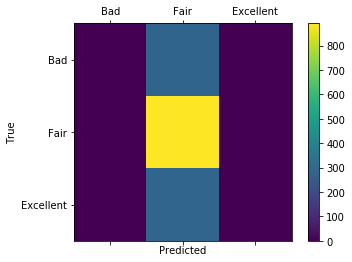

In [327]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM

In [328]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [329]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.608


In [330]:
y_pred = model.predict(X_test)

[[  0 286   0]
 [  0 891   0]
 [  0 289   0]]


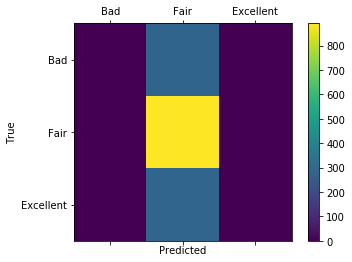

In [331]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred.tolist(),labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()